# **SOCIAL NETWORK ANALYSIS PROJECT GROUP K**


**MUHAMMET EMIN ALBAYRAM** (303991)

**EGE JOHN ISIK** (302991)

**ADASU AKEL** (305201)

**BERKE TAYFUN AKSEKI** (303981)


# **INTRODUCTION**

The dataset that we choosed and implemented for our project is **Friends Episodes**.

The study investigates the relationships among the characters in order to expose the essential characters, dynamics, and structure of the television series Friends using network analytic instruments. Apart from helping with narrative understanding, social network analysis of media content offers insights on real-life events like the impact of well-known people, links inside communities, and information exchange.

Building a graph based on the given relationship data comes first in the research process. Two significant characteristics (the number of nodes and edges) were tallied following data cleansing and graph building. Extra research will be conducted using the given data. Graph visualizing clarity and readability were enhanced using layout techniques.

Average clustering and transitivity tests helped to evaluate the network's structural aspects. The measures showed both general network connection and the generation of subgroups; a low transitivity score indicated that communication outside of the main nodes was limited.

PageRank and Betweenness Centrality helped one ascertain the most important letters by means of centrality measures. These steps produced **"Joey"** as consistently identified as an important node and connection in the network.

Using dynamic simulations, we investigated how thresholds and cascade probabilities affected activation propagation rate and generated contagion scenarios. More generally, these concepts can be applied to enhance public health and marketing initiatives or to look at the spread of influence over social institutions.

The Friends network's important connections, dynamics, and wider consequences for network analysis are shown in this paper by structural analysis, centrality metrics, and dynamic simulations. One ends up completely understanding the network.

# **WEEK 1**

During this week, we started with reading the file and cleaning the data for a better implementation of functions.

After reading the file ve created a graph from it. Since we deleted the extra lines which are not related to the graph we did not have any error during this process.

Then we computed the basic graph properties such as number of nodes, number of edges, avarage degree and density of the graph. With doing this, we had more informaton about the composition of network for the relationships in Friends show.

After doing that, we draw the graph with a function. We set parameter of the graph in a way that it would show the structure of the network with a better visualization. We changed the node sizes with respect to their degrees and colored them with respect to the community detection findings. With this way we made sure that graph is exact and understandable.

Before we started, we installed all the necessary modules that we will be using this week and in the following weeks.

In [ ]:
import random
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from networkx.algorithms.community import greedy_modularity_communities

**Step 1:** We wrote the function for reading relationships from the txt file and creating a list of edges. While doing it, we needed to eliminate the lines which are showing the name of the season/episode and empty lines. The data was separated with space. Splitted the data according to that and added the relationship of two people into a tuple.


In [ ]:
def read_relationships(file_path):
    relationships = []
    with open(file_path, 'r') as f:
        for line in f:
            line = line.strip()
            if line.startswith('#') or not line:
                continue
            people = line.split()
            if len(people) == 2:
                relationships.append((people[0], people[1]))
    return relationships

**Step 2:** We created a graph and added the edges from the tuple we have created before.

In [ ]:
def create_graph(relationships):
    G = nx.Graph()
    G.add_edges_from(relationships)
    return G

**Step 3:**
In this step we wrote the function to compute and display graph properties.

In [ ]:
def compute_graph_properties(G):

    # Calculating properties
    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()
    avg_degree = sum(dict(G.degree()).values()) / num_nodes
    density = nx.density(G)

    # Printing results
    print(f"Number of nodes: {num_nodes}")
    print(f"Number of edges: {num_edges}")
    print(f"Average degree: {avg_degree:.3f}") #Rounded the values
    print(f"Density: {density:.5f}")

    return num_nodes, num_edges, avg_degree, density

The next step is to run all the functions that we created so far and see the output: Graph Properties.

In [ ]:
file_path = 'friends_episodes.txt'
relationships = read_relationships(file_path)
G = create_graph(relationships)
compute_graph_properties(G)

Number of nodes: 747
Number of edges: 1610
Average degree: 4.311
Density: 0.00578


(747, 1610, 4.310575635876841, 0.0057782515226231105)

**Step 4:**
In this step we created a function to draw the graph.

The function uses spring-layout, node size based on degree and colored nodes based on community detection in order to visualize better. In the case where we did not use these properties, the graph was complex and not showing the purpose of a graph. The function draws the graph after creating it.

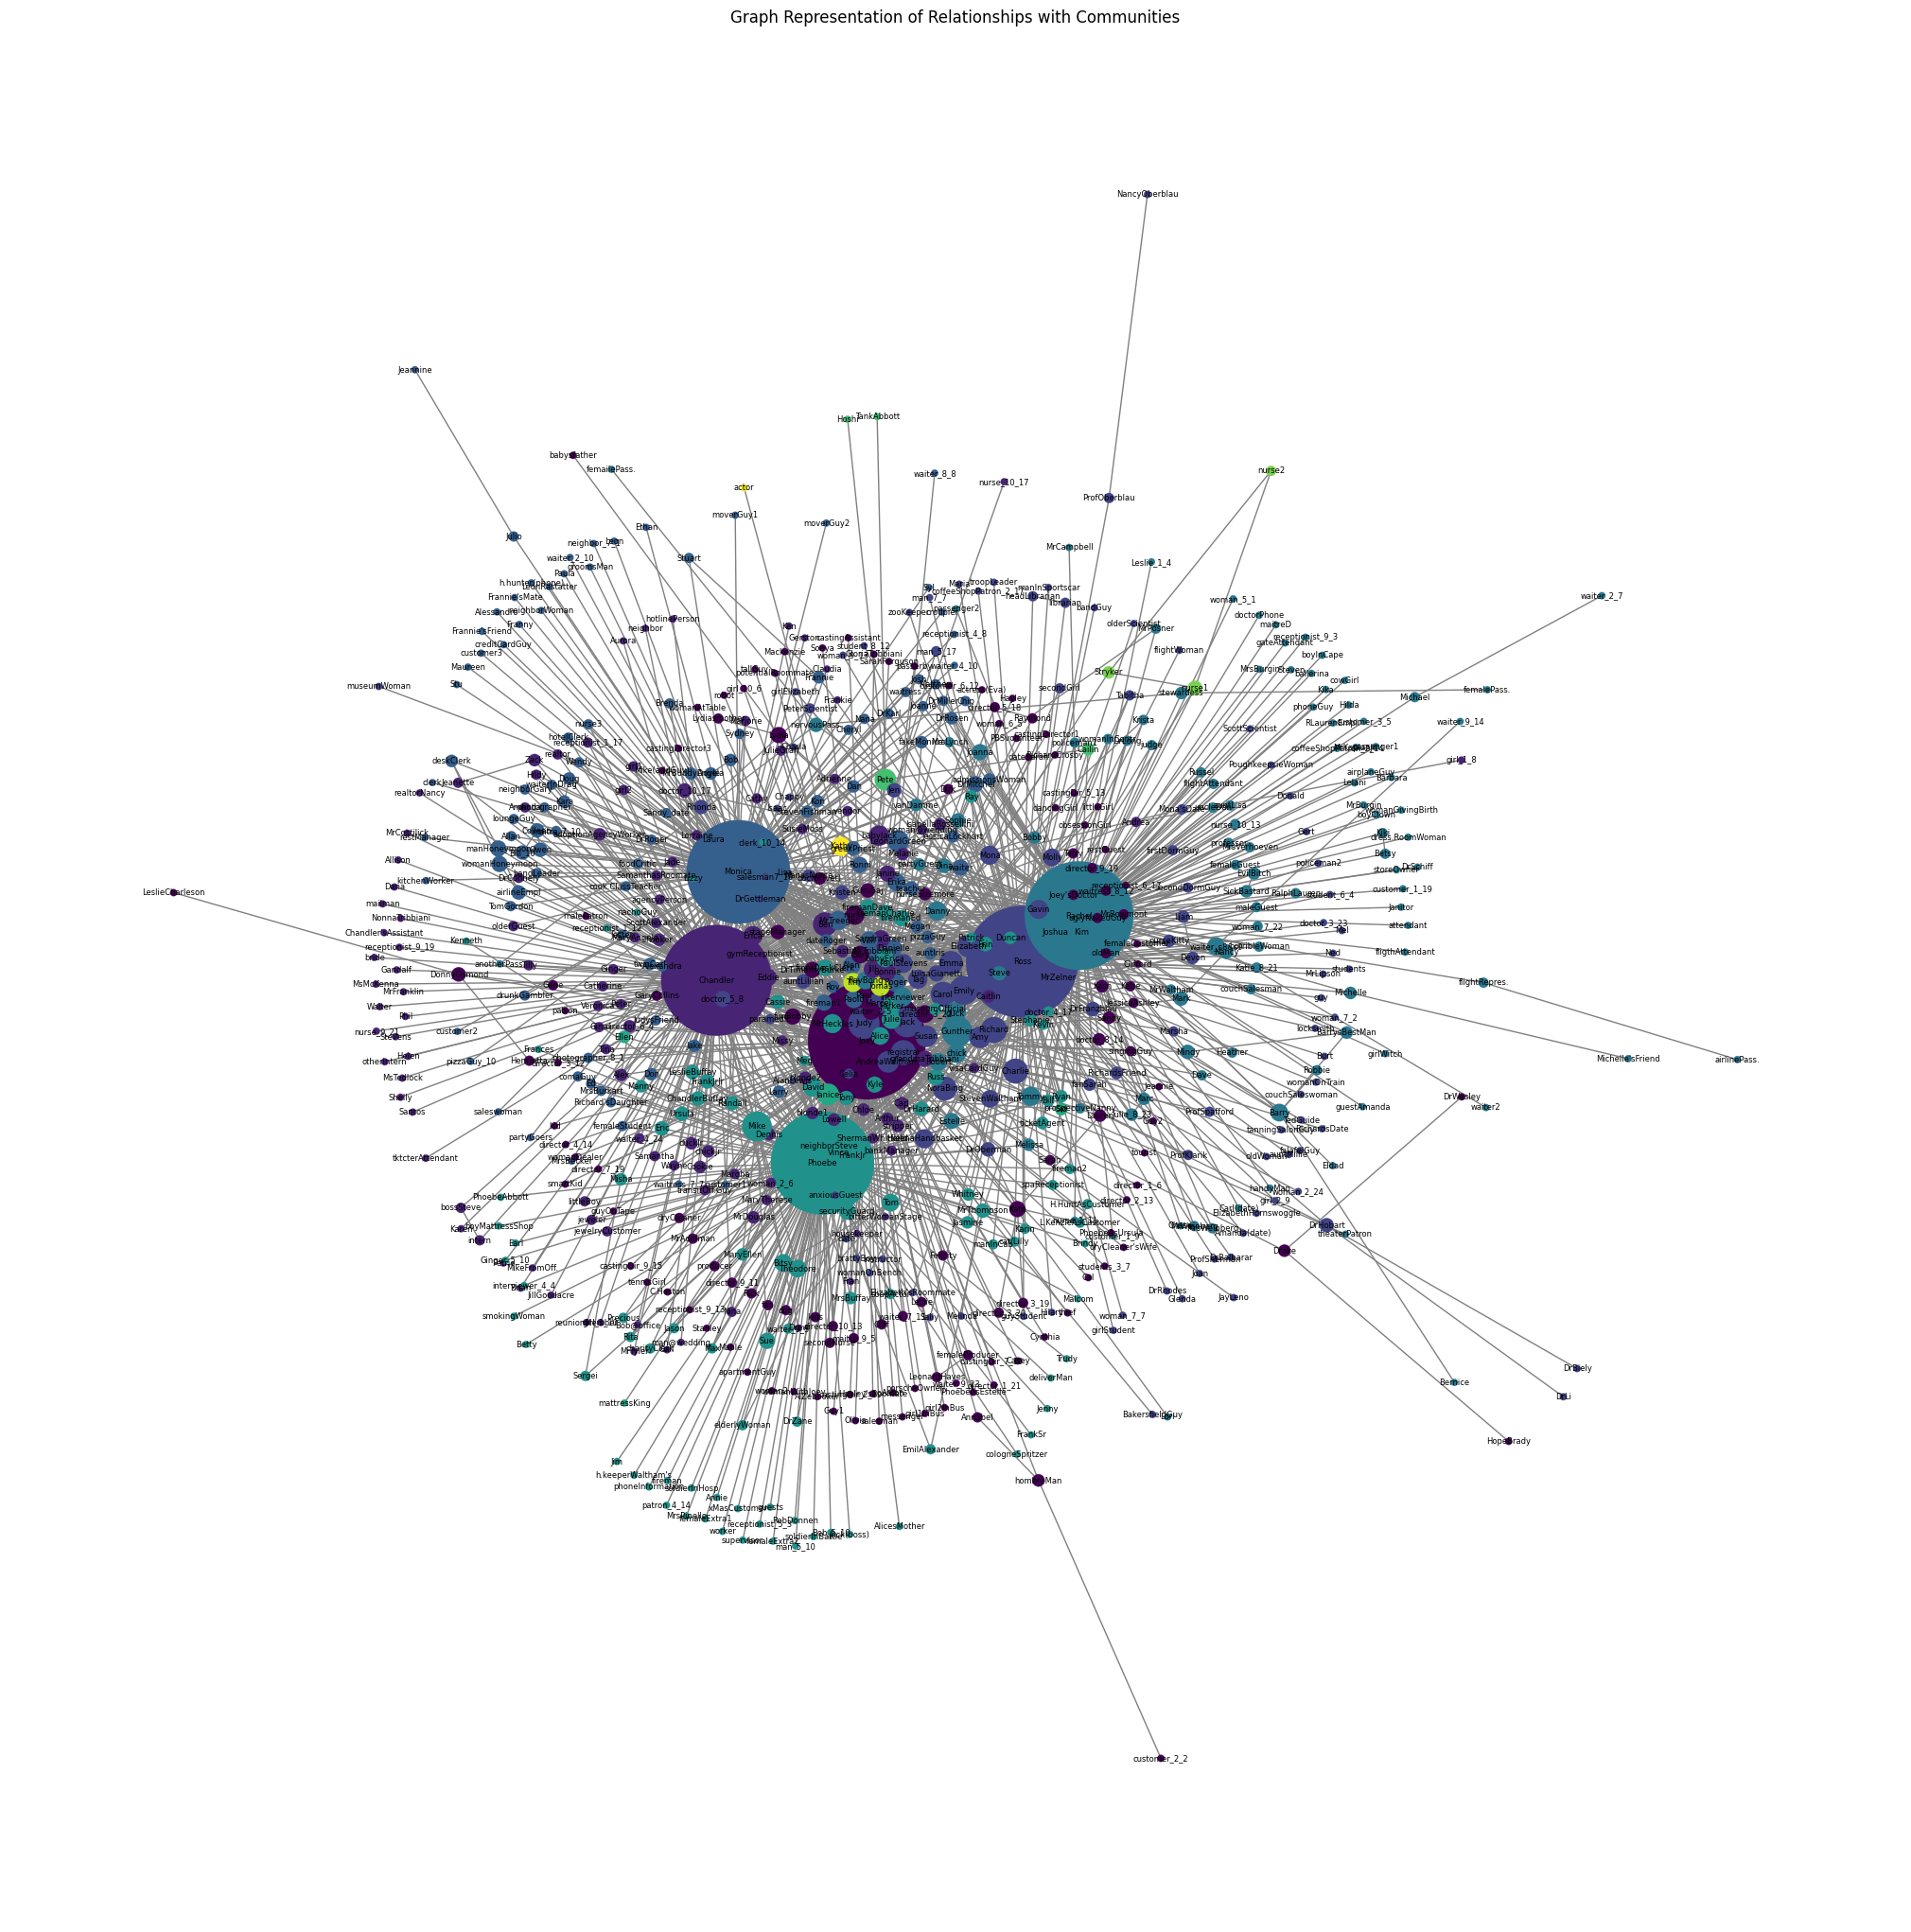

In [ ]:
def draw_graph(G):
    position = nx.spring_layout(G, k=0.1, iterations=30)  # Adjust layout
    node_sizes = [30 * nx.degree(G)[node] for node in G.nodes()]  # Size based on degree

    #Colored nodes:
    communities = list(greedy_modularity_communities(G))
    community_map = {}
    for i, community in enumerate(communities):
        for node in community:
            community_map[node] = i
    node_colors = [community_map[node] for node in G.nodes()]

    # Draw
    plt.figure(figsize=(20, 20))
    nx.draw(G, pos=position, node_size=node_sizes, node_color=node_colors,
            cmap=plt.cm.viridis, edge_color='gray', linewidths=0.1, font_size=6, with_labels=True)

    plt.title("Graph Representation of Relationships with Communities")
    plt.show()


draw_graph(G)

# **WEEK 2**

During the analysis on this week we focused on the largest connected component of the network. By doing this we made sure that our work is on the part of the graph which is most interconnected. We also used the largest connected component to choose whether to implement the first option or the second option on the instructions of the project.

Then we calculated the avarage clustering coefficient and transitivity. From the clustering coefficient we analyzed the existence of tightly connected subgroups. The value of the transitivity show us that the relationships tend to be focused on the main characters rather than a full focused relationship.

This founding also matches with the dynamics of the relationships in the show, we can say that while there is a tight relationship between the six main characters they play a role of bridge between other characters who have less tight relationships.

In order to chose one question from the given project instructions we needed to decide considering the largest connected component.

The given code gives us the largest component of the network.

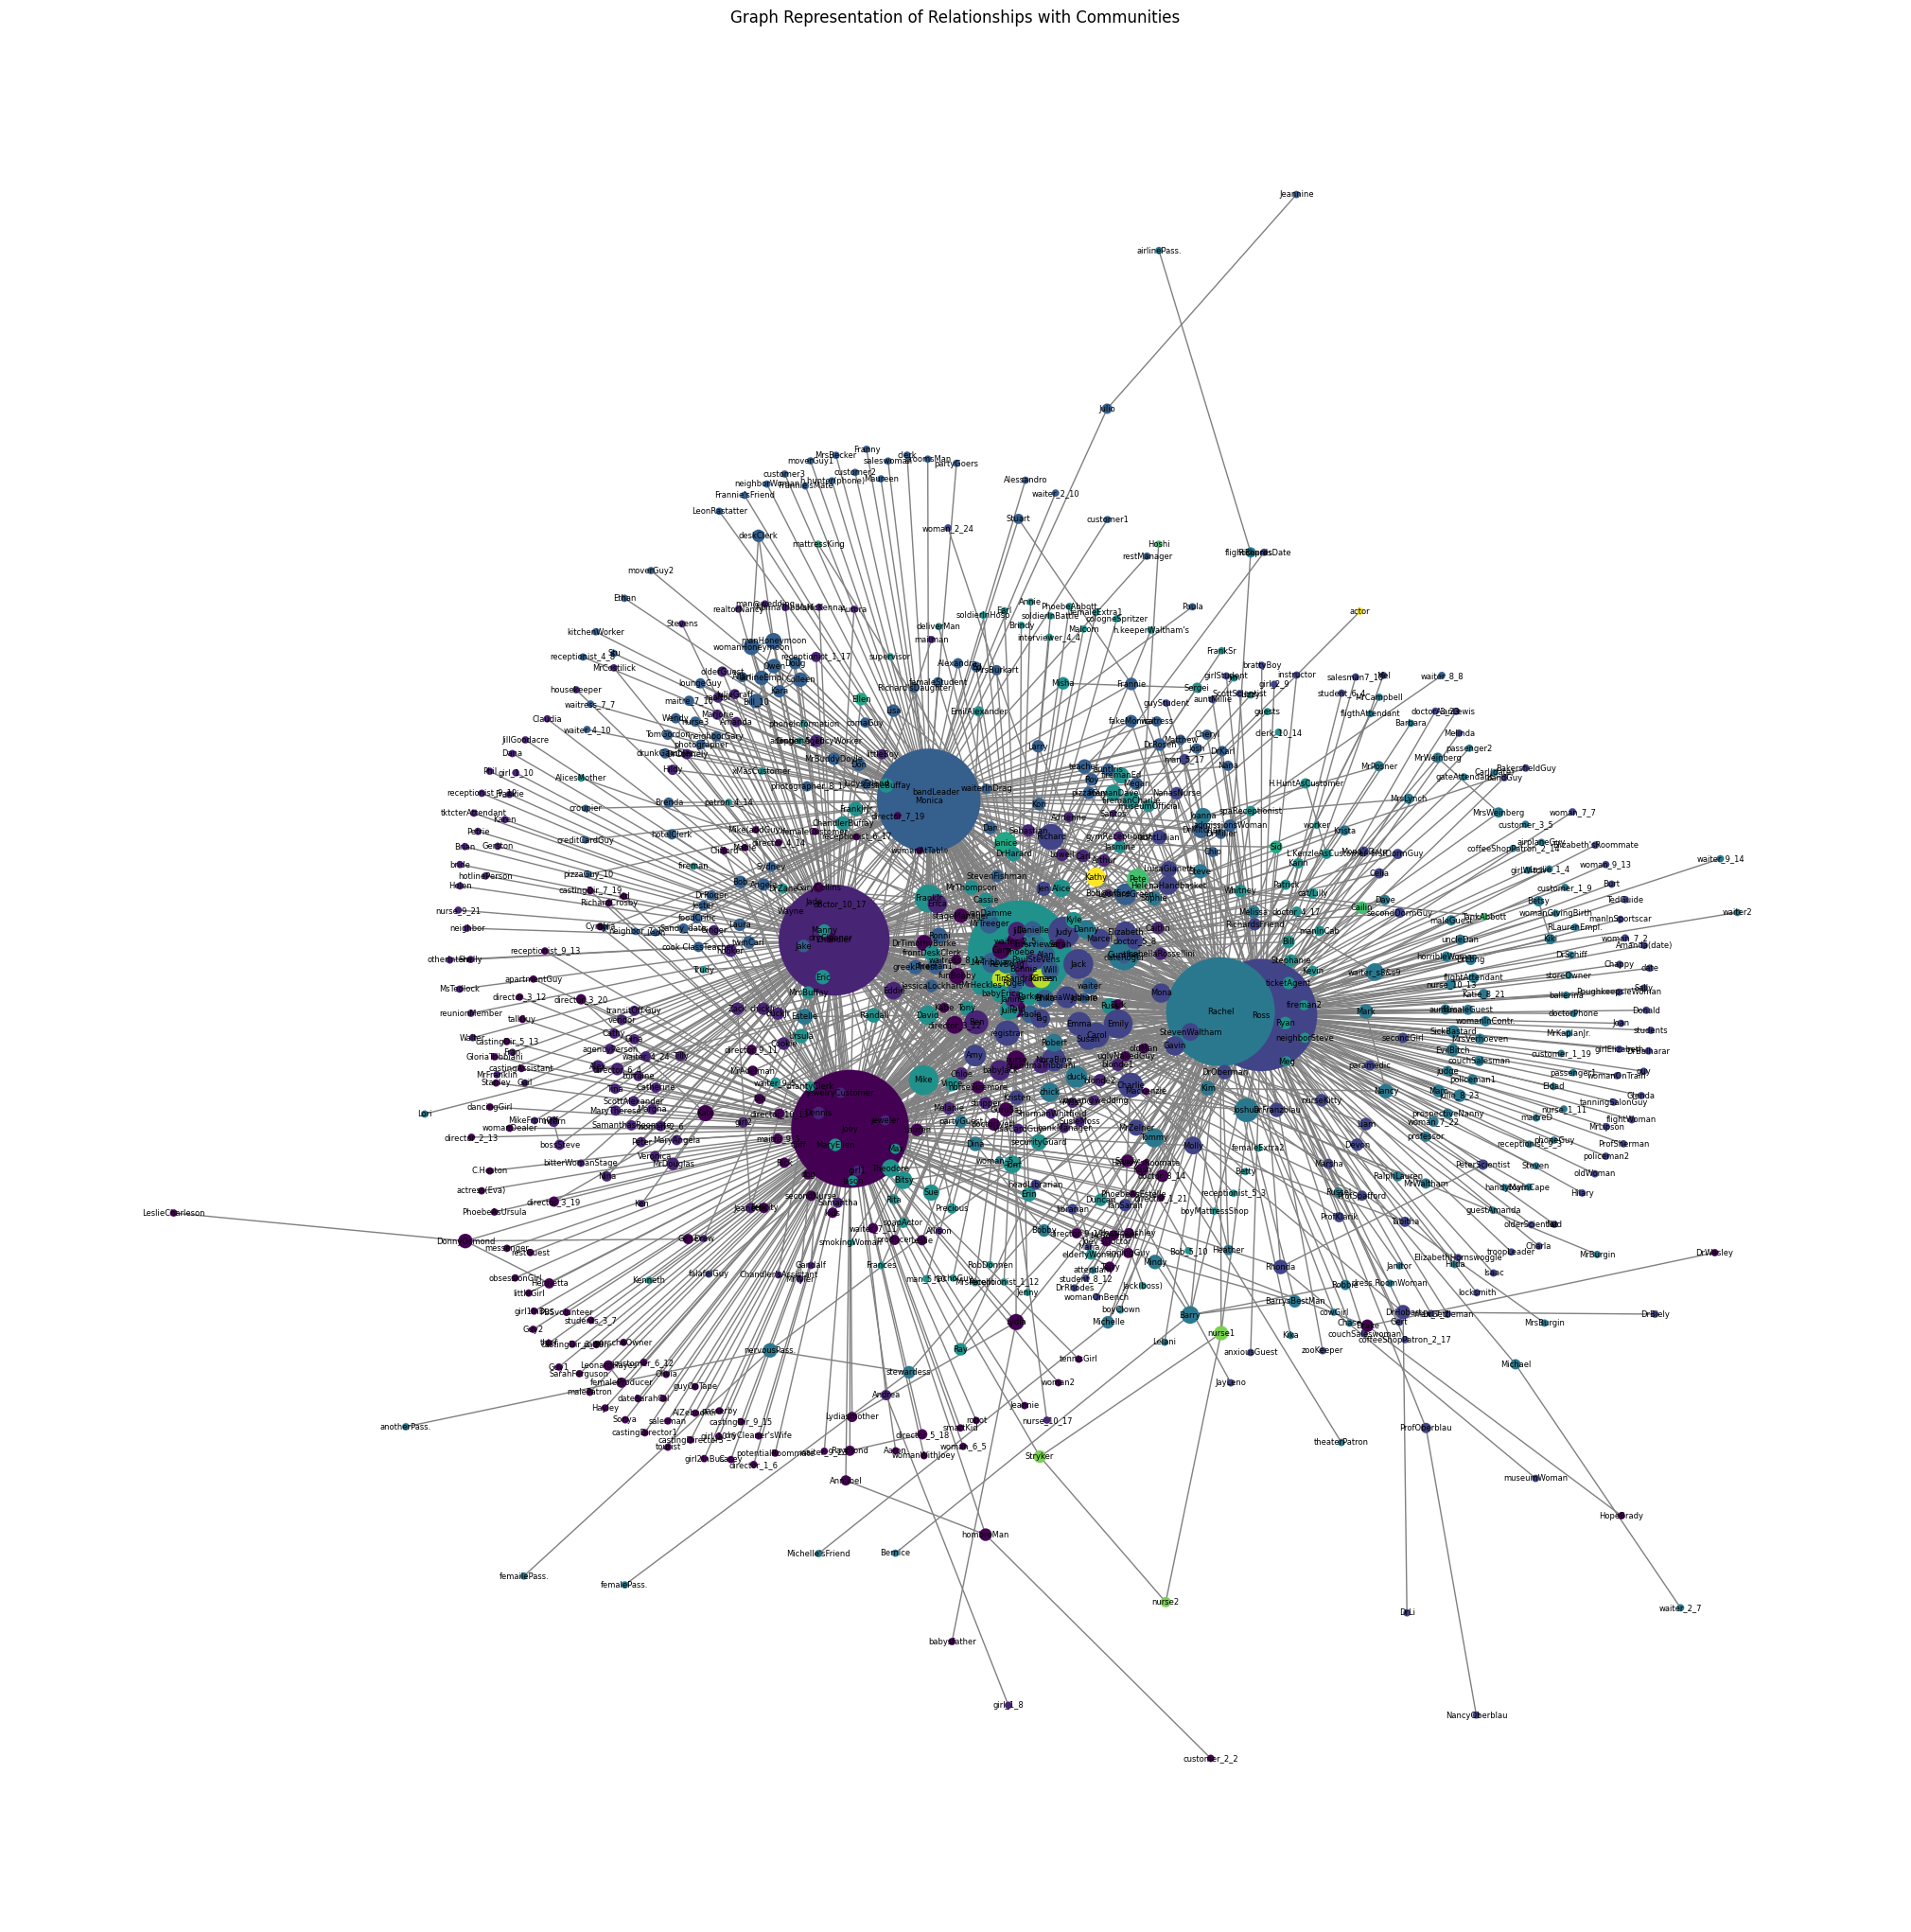

In [ ]:
# Computing the largest connected component to chose whether a and b or a' and b'

largest_component = max(nx.connected_components(G), key=len)
H = G.subgraph(largest_component)
draw_graph(H)

Since the graph is weakly connected, the largest component is the graph itself.

Therefore, we decided to calculate **Average Clustering and Transitivity**. (option a' and b')

With calculating average clusering and transitivity we can see the structure and connectivity of the network more. Calculating these parameters will show us how characters form subgroups and interact within these subgroups. This is more relevant for this kind of social relationships graph analysis.




**Week 2A':** Computing average clustering coefficient and transitivity of the graph

In [ ]:
# Average Clustering Coefficient and Transitivity of the graph

print(f"Average Clustering Coefficient: {nx.average_clustering(G)}")
print(f"Transitivity (Global Clustering Coefficient): {nx.transitivity(G)}")

Average Clustering Coefficient: 0.5002643179271571
Transitivity (Global Clustering Coefficient): 0.0335009492845488


**Week 2B':** Function computing the transitivity by using the basic function of networkx

In [ ]:
# Transitivity using the basic function of networkx

def compute_transitivity(graph):

    # Get the number of triangles in the graph
    triangles = sum(nx.triangles(graph).values()) / 3  # Divided by 3 because each triangle is counted three times

    # Get the number of connected wedges
    wedges = 0

    for node in graph:
        neighbors = list(graph.neighbors(node))
        if len(neighbors) < 2:
            continue
        wedges += len(neighbors) * (len(neighbors) - 1) / 2

    # Transitivity = triangles / wedges
    return triangles / wedges if wedges > 0 else 0

transitivity_value = compute_transitivity(G)

print(f"Transitivity: {transitivity_value}")

Transitivity: 0.0111669830948496


The **transitivity** value that we get is a **low** value. This shows us that the likelihood that two friends of a character are also friends with each other is low. It also shows that there are relatively few closed triangles in the network that we are dealing with.

We can conclude that while there are central relationships mainly around the main characters. However the extended network is not that densely connected. We can say that the interactions in the show mostly occur within the central group and around them.

# **WEEK 3**

We created a function to compute the **Betweenness Centrality** of each node in graph G, measuring each node's centrality based on the number of shortest paths passing through it. This process has showed us the characters of Friends show which are playing a big role as bridges between other characters.

Starting with betweenness values set to zero for all nodes, we iterated over each node as a source, using **breadth-first search (BFS)** to find its shortest paths to other nodes.

For each neighbor along a path, we avoided cycles by checking that nodes weren't revisited within the current path.

After identifying all paths, we calculated each node's contribution by distributing betweenness proportionally according to the number of shortest paths passing through it.

We then normalized these centrality values relative to the total possible paths in the graph, and finally printed each node's centrality rounded to four decimal places.

In [ ]:
def calculate_betweenness_centrality(G):

    betweenness = {node: 0 for node in G.nodes()}

    for s in G.nodes():
        shortest_paths = {v: [] for v in G.nodes()}
        shortest_paths[s] = [[s]] # Initializes shortest path to s itself
        queue = [s]
        while queue: # BFS loop
            v = queue.pop(0) # This removes the first node v (first in first out)
            for w in G.neighbors(v):
                if not shortest_paths[w]:
                    queue.append(w) # Adding unvisited neighbor to queue
                for path in shortest_paths[v]:
                    if w not in path: # Avoiding cycles
                        shortest_paths[w].append(path + [w])

        # Accumulating betweenness
        for t in G.nodes():
            if t != s: # Excluding path to itself
                num_paths = len(shortest_paths[t])
                for path in shortest_paths[t]:
                    for node in path[1:-1]:  # Excluding the first and last nodes for a path
                        betweenness[node] += 1 / num_paths # Adding 1 to the betweennes value of the selected node

    # Normalizing the betweenness values
    scale = 1 / (((len(G.nodes()) - 1) * (len(G.nodes()) - 2))/2)
    for node in betweenness:
        betweenness[node] *= scale

    return betweenness

betweenness_centrality = calculate_betweenness_centrality(G)

print("Betweenness Centrality Values:")

for node, centrality in betweenness_centrality.items():
    print(f"{node}: {centrality:.4f}")

Betweenness Centrality Values:
Monica: 0.9970
Joey: 1.0679
Chandler: 0.9829
Phoebe: 0.8707
Ross: 0.9577
Rachel: 0.8567
waitress: 0.0000
LeonardGreen: 0.0162
Paul: 0.0000
Barry: 0.0132
Franny: 0.0000
Marsha: 0.0011
Carol: 0.0268
Judy: 0.0745
Jack: 0.0618
Susan: 0.0216
Robbie: 0.0003
DrOberman: 0.0020
Mindy: 0.0053
Paula: 0.0000
Alan: 0.0000
Lizzy: 0.0000
Allan: 0.0000
Joanne: 0.0000
Kiki: 0.0013
Leslie_1_4: 0.0000
nurseSizemore: 0.0000
pizzaGuy: 0.0000
brattyBoy: 0.0000
neighbor: 0.0000
visaCardGuy: 0.0000
Angela: 0.0027
Bob: 0.0023
Janice: 0.0121
Tony: 0.0000
horribleWoman: 0.0000
actress(Eva): 0.0000
Aurora: 0.0000
director_1_6: 0.0000
JillGoodacre: 0.0000
MrHeckles: 0.0044
Paolo: 0.0000
Shelly: 0.0000
auntLillian: 0.0006
NanasNurse: 0.0002
Nana: 0.0000
Andrea: 0.0054
girl_1_8: 0.0000
Lowell: 0.0000
Brian: 0.0000
Terry: 0.0000
customer_1_9: 0.0000
obsessionGirl: 0.0000
Marcel: 0.0065
David: 0.0083
Max: 0.0012
Sandy_date: 0.0000
funBobby: 0.0000
kids: 0.0000
girl_1_10: 0.0000
comaGuy: 

**Why Betweennes Centrality?**

Betweenness centrality shows how often a node appears on the shortest path between two other nodes. This measure highlights the intermediate persons in the network, who is the most central for transmitting information and connecting to the others.

In Friends network, nodes with high betweennes centrality are the 6 main characters of the serie which are *Monica, Joey, Chandler, Phoebe, Ross and Rachel.*

Which shows that these characters carry a high importance for connecting other characters and spreading information. We can conclude that the other characters are introduced by their connection with these 6 characters.

Among all these characters, the one with highest betweennes centrality is **Joey**. This means that Joey serves as a highly important bridge creating a connection between other characters. It makes him the most central figure of the social network.

Then, we created a function to visualize the **Cumulative Distribution of Betweenness Centrality**

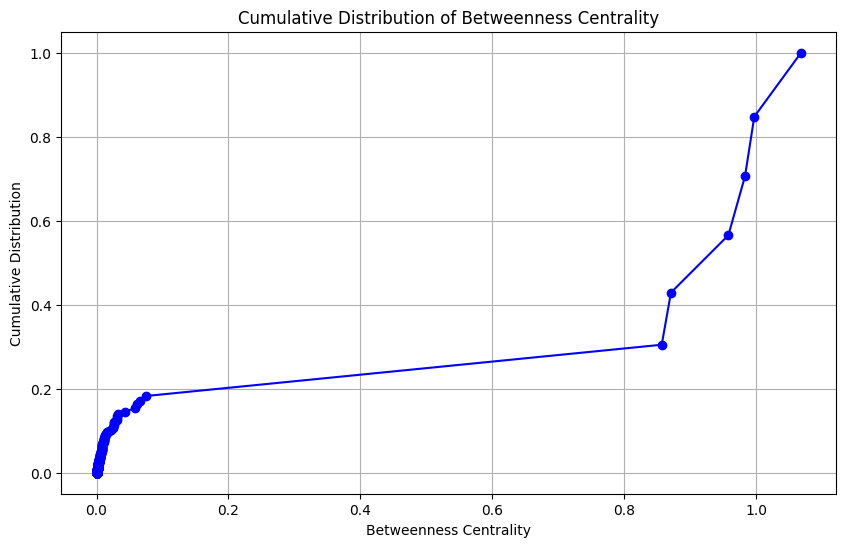

In [ ]:
def plot_cumulative_distribution(betweenness):

    values = sorted(betweenness.values())
    cumulative = np.cumsum(values) / sum(values)  # Normalizing the cumulative sum

    plt.figure(figsize=(10, 6))
    plt.plot(values, cumulative, marker='o', linestyle='-', color='blue')
    plt.xlabel("Betweenness Centrality")
    plt.ylabel("Cumulative Distribution")
    plt.title("Cumulative Distribution of Betweenness Centrality")
    plt.grid(True)
    plt.show()


plot_cumulative_distribution(betweenness_centrality)

By looking at the graph, we can clearly see that there are 6 nodes which are seperated from the others with their betweenness centrality values.


These nodes represent the six main characters of the Friends serie. It is obvious that there is a major difference of betweenness centrality values of those 6 nodes and the other nodes. This shows that they have a key role in the network.

# **WEEK 5**

In the fifth week we used the PageRank algorithm to understand the hierachy and dynamics of influence within the network of Friends show in more detail. This parameter allowed us to see the relative importance of each node according to the nodes that they are connected and importance of those neighbors.

Thus, we can put Joey at the center of the network because he has more and more important contacts throughout the series. We can say that he might be a good choice to spread an information or affect the people on the network because of his good relationshiops.

Also, the core decomposition gave us a hierarchical perspective on the nature of the network structure. This decomposition is useful to identify groups that are densely interconnected.

Then we selected the highest non-empty k-core for visualization. This core shows the subset of nodes that are creating the strongest connections among the network of Friends show.

## **PART 1**

We began by running the built-in PageRank algorithm on the graph G with an alpha set to 0.15. The goal of this query is to find the most influential node accoriding to its connectivity and relationships within the graph. The results give us the most influenting characters of the serie. With the output of these queries we can see the main characters which we can use to communicate with all the characters of serie.

In [ ]:
# Ensuring the graph is connected by taking the largest connected component

if not nx.is_connected(G):
    G = G.subgraph(max(nx.connected_components(G), key=len)).copy()

In [ ]:
# Run the PageRank algorithm with alpha=0.15

pagerank_scores = nx.pagerank(G, alpha=0.15)

We identified the node with the highest PageRank score. When we compared the output to the third week results we found that this node is the same as the one we determined to be most important using betweenness centrality. This node represents the character 'Joey'.

We conclude that 'Joey' is both significant in terms of betweenness and has high connectivity influence showed by its PageRank score.

In [ ]:
# Identifying the node with the highest PageRank score

highest_pagerank_node = max(pagerank_scores, key=pagerank_scores.get)
highest_pagerank_score = pagerank_scores[highest_pagerank_node]

print(f"Highest PageRank Node: {highest_pagerank_node}")
print(f"Highest PageRank Score: {highest_pagerank_score}")

Highest PageRank Node: Joey
Highest PageRank Score: 0.024639450992840577


After finding the one with the most PageRank score, we calculated the cumulative distribution of PageRank scores. With this step we examined how these scores are distributed across nodes. We can see a similar distribution pattern with six distinct points just like how it was on the third week results.

In [ ]:
# Calculating Cumulative Distribution of PageRank scores

pagerank_values = np.array(list(pagerank_scores.values()))
pagerank_values_sorted = np.sort(pagerank_values)
cumulative_distribution = np.cumsum(pagerank_values_sorted)


Finally we can say that the six nodes such as Monica, Joey, Chandler, Phoebe, Ross and Rachel hold higher scores across both scores. This shows us their importance amongs the network.

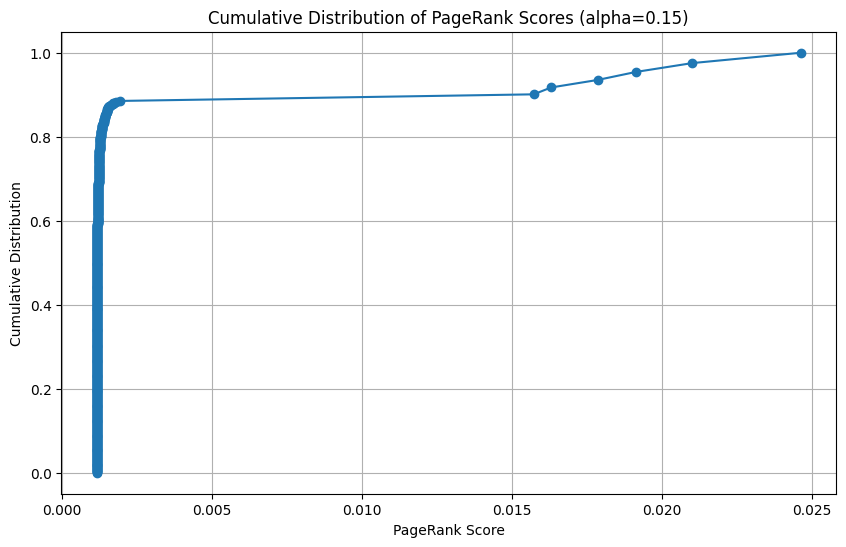

In [ ]:
# Visualization

plt.figure(figsize=(10, 6))
plt.plot(pagerank_values_sorted, cumulative_distribution, marker='o', linestyle='-')
plt.xlabel("PageRank Score")
plt.ylabel("Cumulative Distribution")
plt.title("Cumulative Distribution of PageRank Scores (alpha=0.15)")
plt.grid(True)
plt.show()

## **PART 2**

In this section we implemented a function to compute the **k-shell decomposition** of the graph.

In [ ]:
# Function to compute k-shell and k+1-core
def compute_k_shell_cores(G):
    # Dictionary to store k-shell and k+1-core nodes for all k
    k_shells = {}
    original_nodes = set(G.nodes())

    # Iteratively remove nodes with degree less than k
    for k in range(1, len(original_nodes) + 1):
        # Copy graph to avoid modifying the original
        subgraph = G.copy()
        nodes_to_remove = [node for node in subgraph.nodes() if subgraph.degree(node) < k]

        while nodes_to_remove:
            subgraph.remove_nodes_from(nodes_to_remove)
            nodes_to_remove = [node for node in subgraph.nodes() if subgraph.degree(node) < k]

        k_shells[k] = set(subgraph.nodes())
        if len(subgraph) == 0:
            break

    return k_shells


K-shell decomposition provides us a hierarchy of cores where each k-shell consists of nodes with a minimum degree of k. This decomposition is useful to identify groups that are densely interconnected.

In [ ]:
# Function to plot k+1-core for a given k
def plot_k_plus_one_core(G, k_core_nodes, title):
    # Create a subgraph with k+1-core nodes
    k_core_subgraph = G.subgraph(k_core_nodes)

    # Draw the graph
    plt.figure(figsize=(10, 8))
    nx.draw(k_core_subgraph, with_labels=True, node_color="lightblue", edge_color="gray", node_size=500)
    plt.title(title)
    plt.show()

After computing the k-shells, we selected the highest non-empty k-core for visualization. This core highlights the subset of nodes that form the strongest connections.

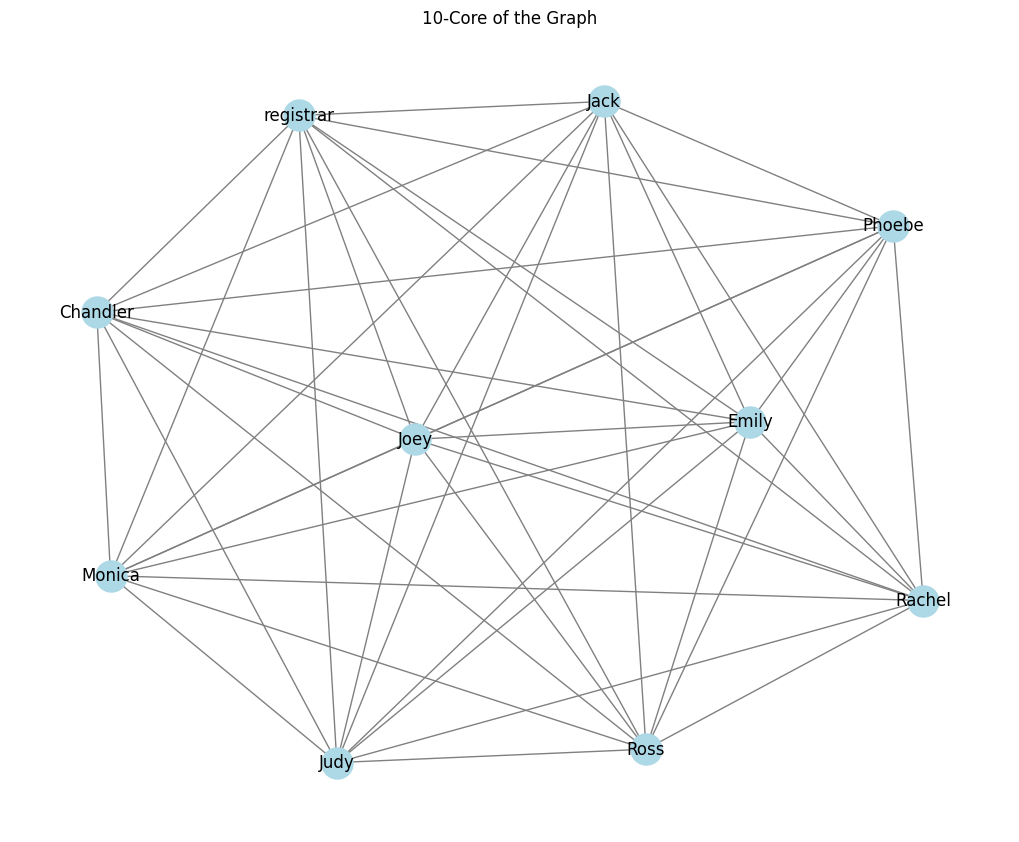

In [ ]:
#Compute k-shells and k+1-cores
k_shells = compute_k_shell_cores(G)

# Choose an adequate k (e.g., largest k with a non-empty core)
adequate_k = max(k_shells.keys()) - 1  # Taking largest k where k+1-core exists
plot_k_plus_one_core(G, k_shells[adequate_k], f"{adequate_k + 1}-Core of the Graph")


The plot provided us an insight into the most interconnected part of network and helped us to understand the core structure of network.

# **WEEK 6**

In Week 6, we explored three community detection methods to divide the network into distinct communities:

* Bridge Removal
* Modularity Optimization
* Label Propagation

These methods were implemented using built-in functions from NetworkX, and the results were compiled into a DataFrame for comparison.

The analysis began with an undirected, unweighted graph representing the largest connected component without loops.

Based on the results, **Modularity Optimization** emerged as the optimal method for clustering this network. It efficiently grouped nodes into meaningful communities and outperformed the other methods in terms of both speed and accuracy.

After that we compiled the results into a DataFrame for comparison and exported the results of modularity optimization into a Gephi-compatible format.

Additional `time` module was used to measure the runtime of each method to evaluate their computational efficiency.

In [ ]:
import time

**Step 1:** Bridge Removal

The undirected, unweighted largest connected component graph without loops was already prepared in G.

In [ ]:
import networkx.algorithms.community as nx_comm

# Bridge Removal
start_time = time.time()
graph = G.copy()
modularity_scores = []
communities_list = []
removal_count = 0
max_removals = 100

# Precompute edge betweenness centrality once
edge_betweenness = nx.edge_betweenness_centrality(graph)
sorted_edges = sorted(edge_betweenness.items(), key=lambda x: x[1], reverse=True)

while len(sorted_edges) > 0 and removal_count < max_removals:
    # Remove the edge with the highest betweenness centrality
    max_edge, _ = sorted_edges.pop(0)
    graph.remove_edge(*max_edge)

    # Get the connected components as communities
    communities = list(nx.connected_components(graph))
    communities_list.append(communities)

    # Compute modularity for the current partition
    modularity = nx_comm.modularity(G, communities)
    modularity_scores.append(modularity)

    # Increment removal count
    removal_count += 1

# Find the best partition with the highest modularity
best_modularity_index = modularity_scores.index(max(modularity_scores))
best_communities_bridge = communities_list[best_modularity_index]
end_time = time.time()
time_bridge = end_time - start_time
modularity_bridge = max(modularity_scores)
num_clusters_bridge = len(best_communities_bridge)
cluster_sizes_bridge = [len(c) for c in best_communities_bridge]

**Step 2:** Modularity Optimization (Clauset-Newman-Moore)


In [ ]:
# Modularity Optimization

start_time = time.time()
communities_modularity = nx_comm.greedy_modularity_communities(G)
end_time = time.time()
time_modularity = end_time - start_time
modularity_modularity = nx_comm.modularity(G, communities_modularity)
num_clusters_modularity = len(communities_modularity)
cluster_sizes_modularity = [len(c) for c in communities_modularity]

**Step 3:** Label Propagation

In [ ]:
# Label Propagation

start_time = time.time()
communities_label = list(nx_comm.label_propagation_communities(G))
end_time = time.time()
time_label = end_time - start_time
modularity_label = nx_comm.modularity(G, communities_label)
num_clusters_label = len(communities_label)
cluster_sizes_label = [len(c) for c in communities_label]

A DataFrame to compare the three community detection methods by summarizing their **clusters, sizes, computation time, and modularity scores.**

In [ ]:
# Compiling results into a DataFrame for comparison
results_df = pd.DataFrame({
    "Method": ["Bridge Removal (Girvan-Newman)",
               "Modularity Optimization", "Label Propagation"],
    "Number of Clusters": [num_clusters_bridge, num_clusters_modularity, num_clusters_label],
    "Cluster Size Distribution": [cluster_sizes_bridge, cluster_sizes_modularity, cluster_sizes_label],
    "Computation Time (s)": [time_bridge, time_modularity, time_label],
    "Modularity": [modularity_bridge, modularity_modularity, modularity_label]
})

print(results_df)

                           Method  Number of Clusters  \
0  Bridge Removal (Girvan-Newman)                   8   
1         Modularity Optimization                  11   
2               Label Propagation                  21   

                           Cluster Size Distribution  Computation Time (s)  \
0                         [729, 2, 2, 2, 2, 3, 2, 5]              2.499913   
1      [138, 126, 121, 120, 118, 109, 4, 4, 3, 2, 2]              1.272215   
2  [694, 5, 2, 2, 2, 2, 2, 2, 2, 3, 4, 3, 3, 2, 4...              0.029343   

   Modularity  
0    0.013561  
1    0.403801  
2    0.049509  


After running the community detections methods we concluded that the Modularity Optimization method is the best amongs the three methods.

The bridge removal method took a lot of time to work and label propagation method divided the network into a highly heterogen communities.

We can see the heterogenity of label propagation by looking at the cluster size distribution. While almost all the other clusters have the size between 1-10, there was a cluster with the size 694.

After all these comparisons we decided that the modularity optimization method is the fast and optimal method for clustering on this network. Then, we used the code in the next section to assign each node to a community according to modularity optimization and export the results with Gephi.

In [ ]:
# Assigning the communities
node_communities = {node: i for i, community in enumerate(communities_modularity) for
node in community}

nx.set_node_attributes(G, node_communities, 'community')

# Exporting with Gephi
gephi_output_path = 'Modularity_Optimization_Community.gexf'
nx.write_gexf(G, gephi_output_path)

gephi_output_path

'Modularity_Optimization_Community.gexf'

# **WEEK 7**

In Week 7, we focused on identifying possible missing links in a network using topological similarity indices.

* The first indice that we used is **Common Neighbors Indice**. This finds the number of common neighbor of two nodes indicating how much these nodes are similar to each other.
* The second indice used in the code is **Jaccard Index**. This is the similarity indice that is found by the division of common neighbors and total neighbors of nodes.

To ensure accuracy, we first isolated the largest connected component of the graph. A function was then defined to compute these indices for unconnected node pairs.

Next, we normalized the CN and JI values between 0 and 1 using MinMaxScaler and added a new column, **Mean_Score**, which represented the arithmetic mean of the scaled CN and JI values.

Then the top 5 scores for each index were identified. The analysis revealed that the CN values for the top 5 pairs were all 1, suggesting these pairs had exactly one common neighbor.


First we need to be sure that the graph is connected by taking the largest connected component.

In [ ]:
if not nx.is_connected(G):
  G = G.subgraph(max(nx.connected_components(G), key=len)).copy()

Next, we defined a function to compute these two similarity indices. The function opens an empty list to store the results. Then, it iterates over the node couples which are not connected and computes Common Neighbors Indice and Jaccard Index with using the built-in function of NetworkX.

At the end, it converts results into a PandaFrame where each row is a missing link and each column is an index.

In [ ]:
def compute_indices(G):
    data = []

    for u, v in nx.non_edges(G):
        cn = len(list(nx.common_neighbors(G, u, v)))
        ji = next(nx.jaccard_coefficient(G, [(u, v)]))[2]
        data.append((u, v, cn, ji))

    # Results to dataframe
    df = pd.DataFrame(data, columns=["Node1", "Node2", "CN", "JI"])
    return df

indices_df = compute_indices(G)

After running the function we **normalized** the CN and JI columns between 0 and 1 by using MinMaxScaler. Then, we added a new column on the dataframe named as 'Mean_Score' indicating the third score created by the arithmetic mean of scaled values of CN and JI. Finally, we defined the top 5 scores for each index of the dataframe.

In [ ]:
# Normalizing CN and JI
scaler = MinMaxScaler()
indices_df[["CN", "JI"]] = scaler.fit_transform(indices_df[["CN", "JI"]])

# Third Score
indices_df["Mean_Score"] = indices_df[["CN", "JI"]].mean(axis=1)

# Top 5 Scores
top_5_cn = indices_df.nlargest(5, "CN")[["Node1", "Node2", "CN"]]
top_5_ji = indices_df.nlargest(5, "JI")[["Node1", "Node2", "JI"]]
top_5_mean = indices_df.nlargest(5, "Mean_Score")[["Node1", "Node2", "Mean_Score"]]

The results given as the output can be used to identify the missing links of the network.

In [ ]:
#Visualizing CN
print("Top 5 Common Neighbors (CN):\n")
print(top_5_cn.to_string(index=True))

#Visualizing JI
print("\nTop 5 Jaccard Index (JI):\n")
print(top_5_ji.to_string(index=True))

#Visualizing Mean Scores
print("\nTop 5 Mean Scores:\n")
print(top_5_mean.to_string(index=True))

Top 5 Common Neighbors (CN):

          Node1      Node2   CN
30440     Emily    Richard  1.0
30964     Emily   NoraBing  1.0
79098   Richard  registrar  1.0
79294   Richard   NoraBing  1.0
160755     Joey     Joshua  1.0

Top 5 Jaccard Index (JI):

                 Node1         Node2   JI
53   receptionist_1_17  drunkGambler  1.0
121  receptionist_1_17        Brenda  1.0
178  receptionist_1_17    bandLeader  1.0
197  receptionist_1_17       realtor  1.0
276  receptionist_1_17  waiterInDrag  1.0

Top 5 Mean Scores:

      Node1        Node2  Mean_Score
13268  Will        Paolo       0.875
13324  Will  SandraGreen       0.875
13457  Will         Gary       0.875
13499  Will    babyErica       0.875
13541  Will   waiter_2_5       0.875


By looking at the values of the indices, we can conclude that the possible missing links have the same scores.

The CN values of each top 5 pairs is 1. This indicates that they all have only one common neighbor. It might not be the best choice to use CN as a measure of finding missing values in this case. So, it is better to use another method like JI and take the mean with it.

JI of the top 5 pairs is also 1. This indicates that they all have the 100 percent of their neighbors common. **“neighborSteve”** is the one which is paired with 4 different characters. We can say that there might be a small, dense community between them. It might be useful to use JI for finding missing values. However we might be overlooking the correlations of wider network patterns if we use it alone because of the perfect JI values.

Here comes the mean of CN and JI to help us with these issues. Using these two indexes together makes out prediction more efficient. By looking at the graph, we can see that the top 5 values are “0.875” which shows that there is a high correlation between the given pairs. The character **“RevBong”** is matched with 5 different pairs. We can assume that this is a well connected node with neighbors which are mostly connected.

The difference of JI and CN outputs with Mean Score output shows us that there could be a big mistake if we would use only one of the indexes to find the missing pairs.

# **WEEK 9**

We created a hybrid attachment model that combines Uniform Attachment (UA) and Preferential Attachment (PA) to generate a new graph. We began by calculating the average degree of the original graph and used it as a parameter for the hybrid model. In this model, we connected new nodes to existing ones either randomly (UA) or based on their degree (PA), with the connection method chosen probabilistically.

Key structural properties, including average degree, clustering coefficient, shortest path length, and diameter, were calculated for both the original and hybrid graphs. These metrics were compared in a DataFrame, revealing insights into the structural differences and similarities between the two graphs.

We also visualized the degree distributions of both graphs using histograms to examine their frequency patterns. The visualizations highlighted how the hybrid graph retained some characteristics of the original while introducing variations through its mixed attachment approach.

This analysis provided a overall understanding of how combining UA and PA affects graph structure and connectivity.

* We defined a function to compute the average degree of a graph by summing all node degrees and dividing by the number of nodes. Then, we calculated and printed the average degree of the original graph, G.

* We determined the parameter m, representing the number of edges added per new node, by taking half of the average degree of the original graph.

In [ ]:
# Calculating average degree of the original graph
def calculate_average_degree(graph):
    """
    Calculate the average degree of a given graph.
    """
    return sum(dict(graph.degree()).values()) / graph.number_of_nodes()

original_degree = calculate_average_degree(G)
print(f"Original Graph Average Degree: {original_degree:.2f}")

# Determining the number of edges per new node (m) based on average degree
m = int(original_degree / 2)
print(f"Calculated parameter (m) for UA and PA: {m}")

Original Graph Average Degree: 4.31
Calculated parameter (m) for UA and PA: 2


We created a function to generate a graph combining:

* Uniform Attachment (UA): Nodes connected randomly.
* Preferential Attachment (PA): Nodes connected based on their degrees.


We started with a complete graph of m + 1 nodes and iteratively added new nodes, connecting them using a mix of UA and PA determined by the p_uniform probability.

We used the hybrid UA-PA model to generate a graph with the same number of nodes as the original graph and parameter m.

In [ ]:
# Our custom model
def hybrid_ua_pa_model(n, m, p_uniform=0.2):
    """
    Generated a hybrid graph using Uniform Attachment and Preferential Attachment
    n: Number of nodes
    m: Number of edges added per new node
    p_uniform: Probability of using Uniform Attachment
    """
    # Starting with a complete graph of m+1 nodes to ensure initial connectivity
    hybrid_graph = nx.complete_graph(m + 1)
    for new_node in range(m + 1, n):
        targets = set()
        while len(targets) < m:
            if np.random.rand() < p_uniform:
                # UA: Randomly pick any node
                targets.add(random.choice(list(hybrid_graph.nodes())))
            else:
                # PA: Weighted by node degree
                nodes, weights = zip(*hybrid_graph.degree())
                targets.add(random.choices(nodes, weights=weights, k=1)[0])
        hybrid_graph.add_edges_from((new_node, target) for target in targets)
    return hybrid_graph

num_nodes = G.number_of_nodes()
hybrid_graph = hybrid_ua_pa_model(num_nodes, m)

We calculated key metrics for both the original and hybrid graphs, including:

* Average degree.
* Average clustering coefficient.
* Average shortest path length (if connected).
Diameter (if connected).

We compared these metrics in a DataFrame.

In [ ]:
def compute_graph_metrics(graph, name):

    avg_degree = sum(dict(graph.degree()).values()) / graph.number_of_nodes()
    avg_clustering = nx.average_clustering(graph)
    avg_distance = nx.average_shortest_path_length(graph) if nx.is_connected(graph) else None
    diameter = nx.diameter(graph) if nx.is_connected(graph) else None
    return {
        "Graph": name,
        "Average Degree": avg_degree,
        "Average Clustering": avg_clustering,
        "Average Distance": avg_distance,
        "Diameter": diameter
    }

hybrid_metrics = compute_graph_metrics(hybrid_graph, "Hybrid UA-PA Graph")
original_metrics = compute_graph_metrics(G, "Original Graph")

# Comparing the metrics
metrics_df = pd.DataFrame([original_metrics, hybrid_metrics])
print(metrics_df)

                Graph  Average Degree  Average Clustering  Average Distance  \
0      Original Graph        4.310576            0.500264          2.590358   
1  Hybrid UA-PA Graph        3.991968            0.013744          4.158324   

   Diameter  
0         5  
1         7  


We visualized the degree distribution for both graphs using histograms to display the frequency of each degree.

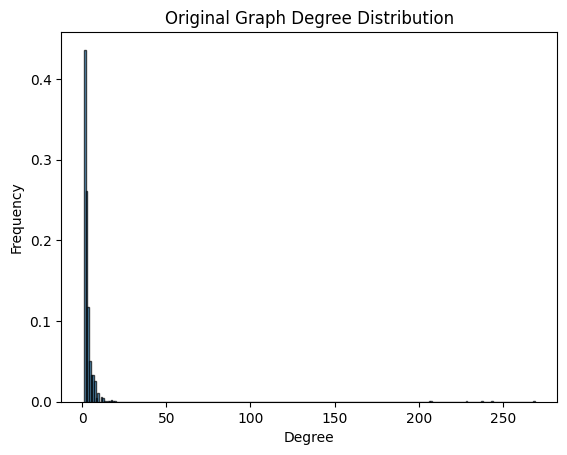

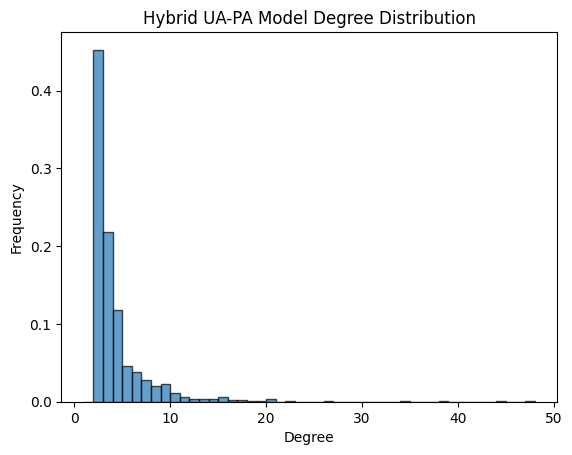

In [ ]:
def plot_degree_distribution(graph, title):
    """
    Plot the degree distribution of a graph.
    """
    degrees = [degree for _, degree in graph.degree()]
    plt.hist(degrees, bins=range(1, max(degrees) + 2), density=True, alpha=0.7, edgecolor='black')
    plt.title(title)
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.show()

plot_degree_distribution(G, "Original Graph Degree Distribution")
plot_degree_distribution(hybrid_graph, "Hybrid UA-PA Model Degree Distribution")

* **Metrics Table:** We displayed a comparison of the original and hybrid graphs' metrics.

* **Degree Distribution Plots:** We visualized the degree distributions to understand differences between the graphs.

# **WEEK 10**

In this week, we analyzed the dynamics of outbreak scenarios within our Friends network. During the analysis we used varying thresholds and cascade probabilities to see their effect on diffusion of outbreak.

The code is focused on to see how the change in these parameters influence the outbreak spread in different cases where initial scenarios are different.

We used 1%, 5%, and 20% of the network to initalize the activation in these different cases. The parameters that we calculated are the final active node count and stebilization steps.

Stabilization steps show us in how much time does the network reach equilibrium while final active count shows overall reavticity of network.

By looking at the results we can say that when we set the parameters to make diffusion more possible the final active node count increased while the steps decreased. We did this by decreasing the threshold for fractional threshold spread and increasing the independent cascade.

Decreasing fractional spread threshold makes the nodes require less active neighbors in order to be active. Increasing the independent cascade increases the possibility of one neighbor to affect the nodes decision to being active.

We implemented a **Hybrid Contagion Model** that combines two mechanisms to simulate influence spread in a network:

* Fractional Threshold Activation and,
* Stochastic Activation via Independent Cascade

Nodes activate either when the proportion of active neighbors exceeds a predefined threshold or probabilistically, based on the cascade probability (`cascade_prob`).

Starting with an initial set of active nodes (`seed nodes`), we iteratively updated the network state over a specified number of steps (`max_steps`).

In [ ]:
def hybrid_contagion_model(graph, seed_nodes, threshold, cascade_prob, max_steps):
    """
    Hybrid Contagion Model combining fractional threshold and independent cascade.
    Parameters:
        graph: NetworkX graph
        seed_nodes: List of initially active nodes
        threshold: Fractional threshold for activation
        cascade_prob: Probability of stochastic activation via independent cascade
        max_steps: Maximum number of simulation steps
    Returns:
        active_nodes_over_time: List of sets showing active nodes at each time step
    """
    active_nodes = set(seed_nodes)
    newly_activated = set(seed_nodes)
    active_nodes_over_time = [set(active_nodes)]

    for step in range(max_steps):
        next_newly_activated = set()
        for node in graph.nodes():
            if node in active_nodes:
                continue
            neighbors = set(graph.neighbors(node))
            active_neighbors = neighbors & active_nodes

            # Fractional Threshold Activation
            if len(active_neighbors) / max(len(neighbors), 1) >= threshold:
                next_newly_activated.add(node)
            # Stochastic Activation via Cascade
            elif any(random.random() < cascade_prob for _ in active_neighbors):
                next_newly_activated.add(node)

        if not next_newly_activated:
            break

        newly_activated = next_newly_activated
        active_nodes.update(newly_activated)
        active_nodes_over_time.append(set(active_nodes))

    return active_nodes_over_time

At each step, we checked for new activations using the threshold condition and the cascade mechanism. The process stopped when no new nodes were activated or when the maximum steps were reached. The model returned the progression of active nodes over time, offering insights into how influence spreads under hybrid rules.

We simulated outbreak scenarios on a network to analyze how influence spreads under various conditions.

Each scenario began with a unique set of seed nodes (`seed_scenarios`) and applied a hybrid contagion model with a fractional threshold and stochastic activation. The simulation ran for up to `max_steps`, tracking the activation process over time.

In [ ]:
def simulate_outbreak_scenarios(graph, threshold, cascade_prob, seed_scenarios, max_steps=50):
    """
    Simulate different outbreak scenarios on the graph.
    Parameters:
        graph: NetworkX graph
        threshold: Fractional threshold for activation
        cascade_prob: Probability of stochastic activation via independent cascade
        seed_scenarios: List of seed node sets for different outbreak scenarios
        max_steps: Maximum number of simulation steps
    Returns:
        results: Dictionary containing the results for each scenario
    """
    results = {}
    for scenario_name, seed_nodes in seed_scenarios.items():
        active_nodes_over_time = hybrid_contagion_model(graph, seed_nodes, threshold, cascade_prob, max_steps)
        final_active_count = len(active_nodes_over_time[-1])
        stabilization_steps = len(active_nodes_over_time)
        results[scenario_name] = {
            "Final Active Count": final_active_count,
            "Stabilization Steps": stabilization_steps,
            "Active Nodes Over Time": [len(active) for active in active_nodes_over_time]
        }

    return results

For each scenario, we recorded key outcomes:

* Total number of activated nodes when the process stabilized,
* Number of steps required for stabilization,
* Progression of active node counts at each step.

This approach allowed us to compare how different initial conditions influence the spread of activation across the network.

We defined outbreak scenarios to simulate the spread of activation under varying sizes and origins. These scenarios included:

* **Small Outbreaks** (1% of nodes selected randomly)
* **Medium Outbreaks** (5%)
* **Large Outbreaks** (20%)

The scenarios allowed us to analyze how different initial conditions impact the activation process in the network.

In [ ]:
# Scenarios for different outbreak sizes and origins
num_nodes = G.number_of_nodes()
seed_scenarios = {
    "Small Outbreak (1% Random Nodes)": random.sample(list(G.nodes()), max(1, int(0.01 * num_nodes))),
    "Medium Outbreak (5% Random Nodes)": random.sample(list(G.nodes()), max(1, int(0.1 * num_nodes))),
    "Large Outbreak (20% Random Nodes)": random.sample(list(G.nodes()), max(1, int(0.4 * num_nodes))),
}

# Two sets of parameters
parameters = [
    {"threshold": 0.80, "cascade_prob": 0.01},
    {"threshold": 0.20, "cascade_prob": 0.10},

]

# Running simulations for each parameter set
all_results = {}
for param_set in parameters:
    param_key = f"Threshold={param_set['threshold']}, Cascade Prob={param_set['cascade_prob']}"
    all_results[param_key] = simulate_outbreak_scenarios(
        G,
        param_set["threshold"],
        param_set["cascade_prob"],
        seed_scenarios
    )

Two parameter sets were tested, each specifying a **threshold** for fractional activation and a **cascade probability** for stochastic activation.

For each parameter combination, we ran simulations across all defined outbreak scenarios, tracking the outcomes.

The results were organized by parameter set, providing insights into how threshold and cascade probability influence the spread dynamics.

We visualized the results of outbreak simulations to compare activation dynamics across scenarios and parameter sets. By using a plotting function we visualized to compare activation dynamics across scenarios and parameter sets.

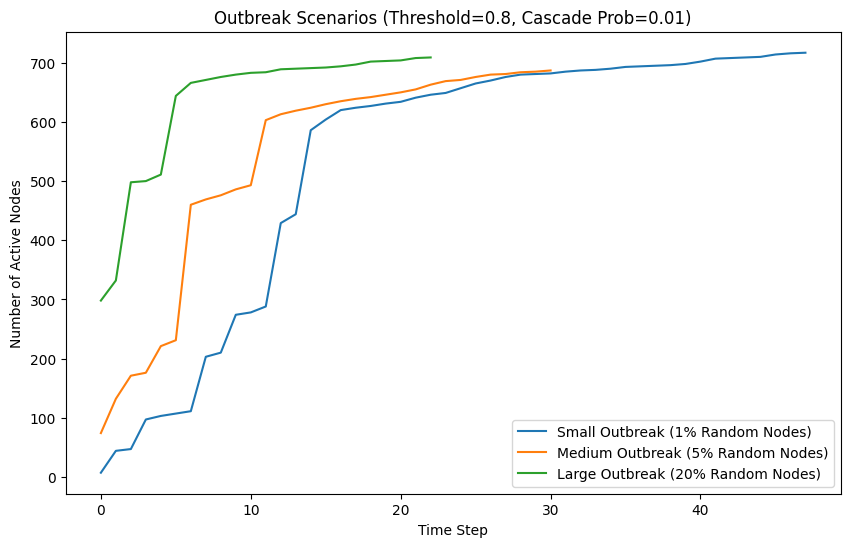

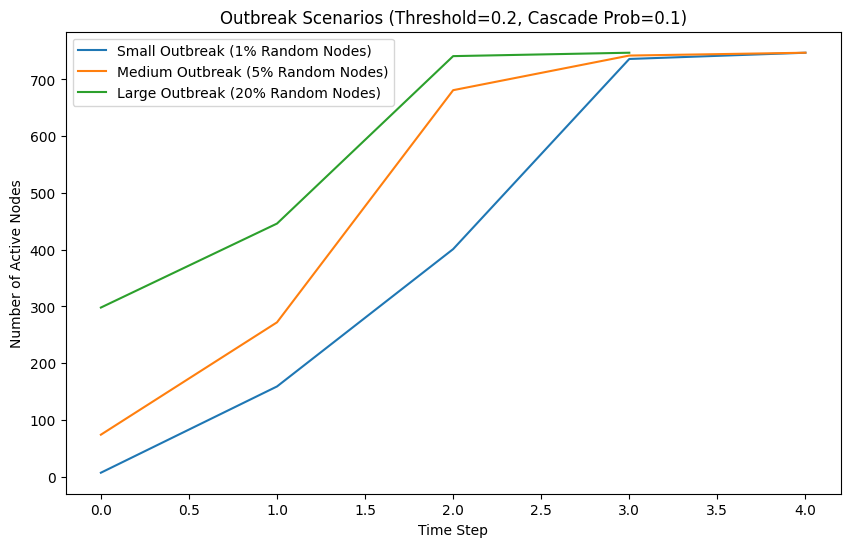

In [ ]:
# Function for visualizing
def plot_outbreak_results(all_results):
    """
    Plot outbreak results for each parameter set across different scenarios.
    """
    for param_key, outbreak_results in all_results.items():
        plt.figure(figsize=(10, 6))
        for scenario, result in outbreak_results.items():
            active_counts = result["Active Nodes Over Time"]
            plt.plot(active_counts, label=scenario)
        plt.title(f"Outbreak Scenarios ({param_key})")
        plt.xlabel("Time Step")
        plt.ylabel("Number of Active Nodes")
        plt.legend()
        plt.show()

plot_outbreak_results(all_results)

We visualized the outbreak scenarios across various parameter sets to analyze the spread of activation over time. Each line represents the number of active nodes at different time points for varying outbreak sizes.

1. In the first graph, with a low threshold (0.2) and high cascade probability (0.1), activation spreads quickly and stabilizes within a few steps.

2. In the second graph, with a high threshold (0.8) and low cascade probability (0.01), exhibits a slower and more gradual spread, particularly for smaller outbreaks.

These comparisons reveal how thresholds and cascade probabilities impact the speed and scale of activation.

Finally, we created a summary table to consolidate key outcomes from the outbreak simulations. For each parameter set and outbreak scenario, the table includes the **final number of active nodes** and the **number of steps needed for stabilization**.

In [ ]:
summary_data = []
for param_key, outbreak_results in all_results.items():
    for scenario, result in outbreak_results.items():
        summary_data.append({
            "Parameter Set": param_key,
            "Scenario": scenario,
            "Final Active Count": result["Final Active Count"],
            "Stabilization Steps": result["Stabilization Steps"]
        })

summary_df = pd.DataFrame(summary_data)

# Displaying the summary table
print("Outbreak Scenarios Summary:")
print(summary_df)

Outbreak Scenarios Summary:
                      Parameter Set                           Scenario  \
0  Threshold=0.8, Cascade Prob=0.01   Small Outbreak (1% Random Nodes)   
1  Threshold=0.8, Cascade Prob=0.01  Medium Outbreak (5% Random Nodes)   
2  Threshold=0.8, Cascade Prob=0.01  Large Outbreak (20% Random Nodes)   
3   Threshold=0.2, Cascade Prob=0.1   Small Outbreak (1% Random Nodes)   
4   Threshold=0.2, Cascade Prob=0.1  Medium Outbreak (5% Random Nodes)   
5   Threshold=0.2, Cascade Prob=0.1  Large Outbreak (20% Random Nodes)   

   Final Active Count  Stabilization Steps  
0                 717                   48  
1                 687                   31  
2                 709                   23  
3                 747                    5  
4                 747                    5  
5                 747                    4  


For a **high threshold (0.8)** and **low cascade probability (0.01)**, the spread is slower, requiring more stabilization steps, especially for smaller outbreaks e.g. 48 steps for small outbreaks versus 23 for large. (*the results may change on each running due to randomness*)

This indicates that activation depends heavily on meeting the threshold condition.


In contrast, a **low threshold (0.2)** and **high cascade probability (0.1)** result in faster and more uniform stabilization e.g. 4-5 steps across all outbreak sizes with the final activation consistently reaching near-maximum levels 747 nodes. (*the results may change on each running due to randomness*)

This demonstrates that lower thresholds and higher probabilities significantly enhance both the speed and scale of activation in the network.

# **CONCLUSION**

The analysis of Friends network project provided a broad exploration of the relationships in the Friends Episodes dataset. By mixing the coding knowledge with the topics covered during the Social Network Analysis course we explored the details of connection between characters of the serie. The process took 10 weeks which we applied different graphical methods in each one.

In the introduction, we created an undirected graph from the Friends Episodes dataset analyzed the properties of graph such as number of nodes, number of edges and density. These methods gave us an insight about the basis of the Network. By looking at our resuls, we concluded that the density of the graph was relative because of the frequent interactions of characters. With using the visualizations we were able to see the key hubs of the network which are mostly around the main characters **Monica, Joey, Chandler, Phoebe, Ross and Rachel.**

The following weeks was focused on more advance analysis of the network. In these weeks, we computed clustering coefficients, transitivity, centrality and etc. By computing these metrics we learned more about the high degree of local cohesiveness. This showed us that the nature of the relationships are dense within the groups formed by the main characters of the show. By calculating the betweennes centrality we identified the central characters which are like a bridge between other characters. With the results, we saw that the node with the highest betweennes centrality is **Joey.** This highlights that this character is palying an important role in the serie with conecting the characters to each other.

After that, we implemented some more advanced algorithms like k-shell decomposition and PageRank to see the hierarchy and influencing in the network. These parameters showed us the most influenting characters of the serie. With the output of these queries we can see the main characters which we can use to communicate with all the characters of serie. The k-shell decomposition showed us the interconnectedness of the network's core.

Later, we used community detection techniques such as Bridge Removal, Modularity Optimization and Label Propagation to uncover the subgroups of the network. We decided that the Modularity Optimization is the best technique by comparing the method evaluations. Then, we visualized the communities found by modularity optimization with Gephi.

Fınally, Common Neighbors and Jaccard Index are used to find the potential missing pairs. While using these two methods, we also combined them with using their mean to find the missing pairs and decided that it is a better way to find the missing pairs.

In conclusion, with doing this project we got an insight to the Friends Episodes dataset and used our knowled of networks in a more realistic case. It improved the computational skills of us with requiring us to use different algorithms and methods. Wıth applying the analysis techniques for each week, we achieved an understanding of the dataset, the relationships within and the layered composition of the network.